In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
import re
import os
from collections import Counter

In [2]:
os.chdir('C:\\Users\\SYED YUNUS AHMED\\Untitled Folder')

In [3]:
train_data=pd.read_csv('titanic_train.csv')
test_data=pd.read_csv('titanic_test.csv')

# EDA

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train_data['SibSp']=train_data['SibSp'].astype('int')
train_data['Parch']=train_data['Parch'].astype('int')

In [11]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int32
Parch            int32
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Text(0.5, 1.0, 'Survival Rate by Embarked')

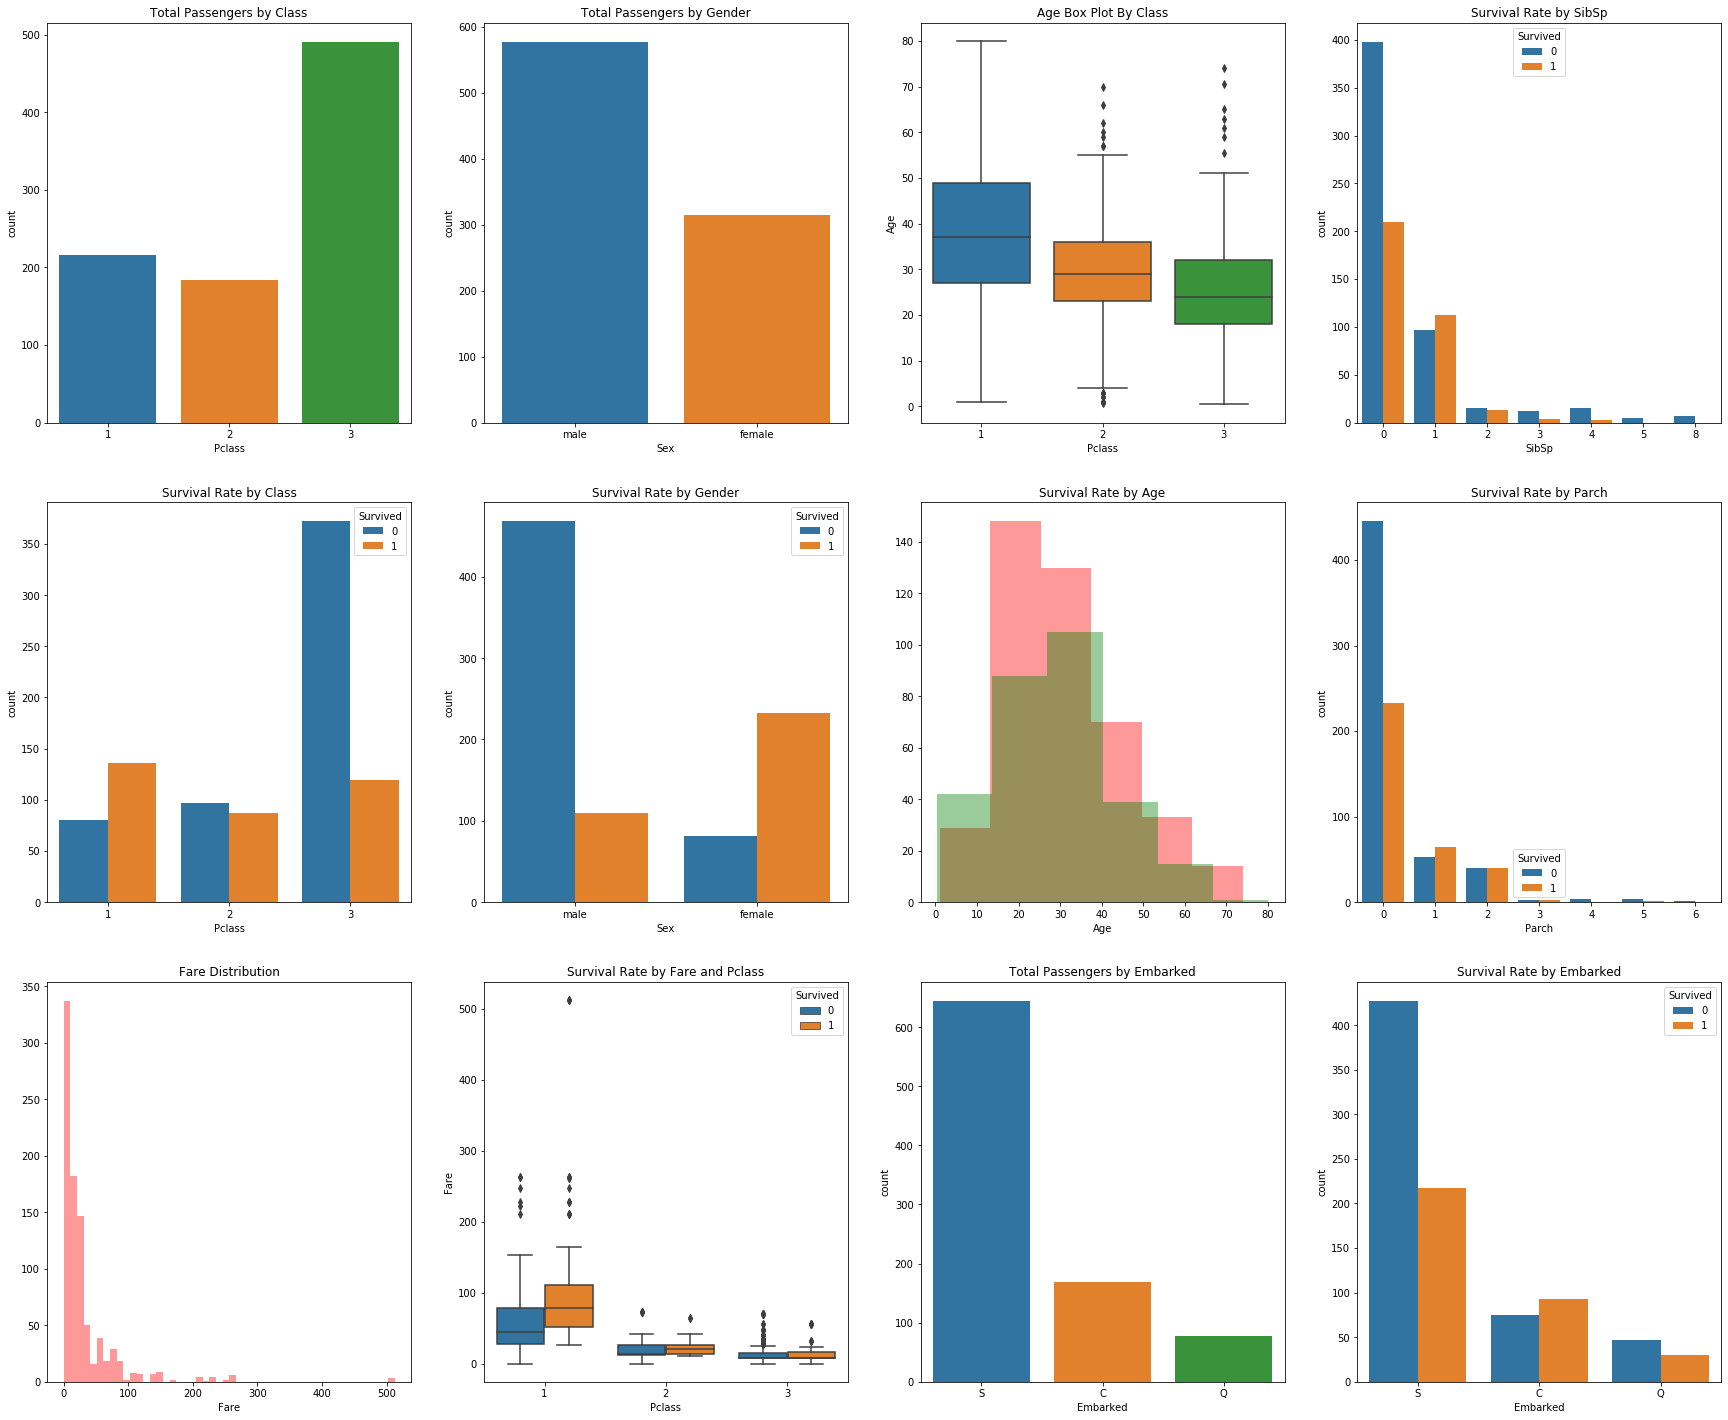

In [12]:
#EDA on dataset

f,ax=plt.subplots(nrows=3,ncols=4,figsize=(30,25))
sns.countplot('Pclass',data=train_data,ax=ax[0,0])
sns.countplot('Sex',data=train_data,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train_data,ax=ax[0,2])
sns.countplot(x='SibSp',hue='Survived',data=train_data,ax=ax[0,3])

sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1,0])
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1,1])
sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='red',bins=6)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='green',bins=6)
sns.countplot('Parch',hue='Survived',data=train_data,ax=ax[1,3])

sns.distplot(train_data['Fare'].dropna(),ax=ax[2,0],kde=False,color='red')
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=train_data,ax=ax[2,1])
sns.countplot('Embarked',data=train_data,ax=ax[2,2])
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[2,3])


ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

In [13]:
# Function to detect Outliers


def detect_outliers(df,n,features):
    
    outlier_indices=[]
    
    for i in features:
        Q1=np.percentile(df[i],25)
        Q3=np.percentile(df[i],75)
        IQR=Q3-Q1
        outlier_step=1.5*IQR
        outlier_list_col=df[(df[i]<Q1-outlier_step) | (df[i]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    #selecting observations containig more than 2 outliers
        
    outlier_indices=Counter(outlier_indices)
        
    multiple_outliers=list( k for k,v in  outlier_indices.items() if v>n) 
    return multiple_outliers


Outliers_to_drop=detect_outliers(train_data,2,["Age","SibSp","Parch","Fare"])
train_data.loc[Outliers_to_drop]

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [14]:
train_data=train_data.drop(Outliers_to_drop,axis=0).reset_index(drop=True)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int32
Parch          881 non-null int32
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 75.8+ KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
train_data.drop(['Name'],axis=1,inplace=True)

In [19]:
test_data.drop(['Name'],axis=1,inplace=True)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int32
Parch          881 non-null int32
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int32(2), int64(3), object(4)
memory usage: 69.0+ KB


In [21]:
full_data=[train_data,test_data]

In [22]:
Survival=train_data['Survived']
Survival.describe()

count    881.000000
mean       0.385925
std        0.487090
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

# Bi-Variate statistical analysis

One of the first tasks in Data Analytics is to convert the variables into numerical/ordinal values. There are multiple types of data

a) Qualitative data: discrete

Nominal: no natural order between categories. In this case: Name
Categorical: Sex
b) Numeric or quantitative data

Discrete: could be ordinal like Pclass or not like Survived.
Continuous. e.g.: age Many feature engineering steps were taken from Anisotropic's excellent kernel.

In [23]:
# Gender

for dataset in full_data:
    dataset['Sex']=dataset['Sex'].map({'female':0,'male':1}).astype(int)



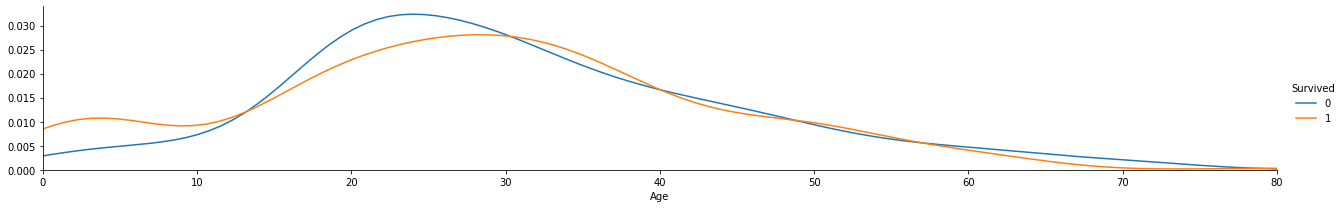

In [24]:
#Age

a=sns.FacetGrid(train_data,hue='Survived',aspect=6)
a.map(sns.kdeplot,'Age')
a.set(xlim=(0,train_data['Age'].max()))
a.add_legend()

In [25]:
train_data['Age'].value_counts()

24.00    29
22.00    27
18.00    26
28.00    25
30.00    25
         ..
12.00     1
36.50     1
55.50     1
20.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [26]:
for dataset in full_data:
    age_avg=dataset['Age'].mean()
    age_std=dataset['Age'].std()
    age_nullcount=dataset['Age'].isnull().sum()
    age_null_randomfill=np.random.randint(age_avg-age_std,age_avg+age_std,size=age_nullcount)
    dataset['Age'][np.isnan(dataset['Age'])]=age_null_randomfill
    dataset['Age']=dataset['Age'].astype(int)
    
    dataset.loc[dataset['Age']<=14,'Age']=0
    dataset.loc[(dataset['Age']>14) & (dataset['Age']<=30),'Age']=1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age']= 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age']= 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age']= 4
    dataset.loc[ dataset['Age'] > 60, 'Age']= 4
    
    
train_data['Age'].value_counts()

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    425
2    217
3     97
0     78
4     64
Name: Age, dtype: int64

In [27]:
train_data[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Age',ascending=True)

,Age,Survived
0,0,0.576923
1,1,0.341176
2,2,0.414747
3,3,0.391753
4,4,0.343750


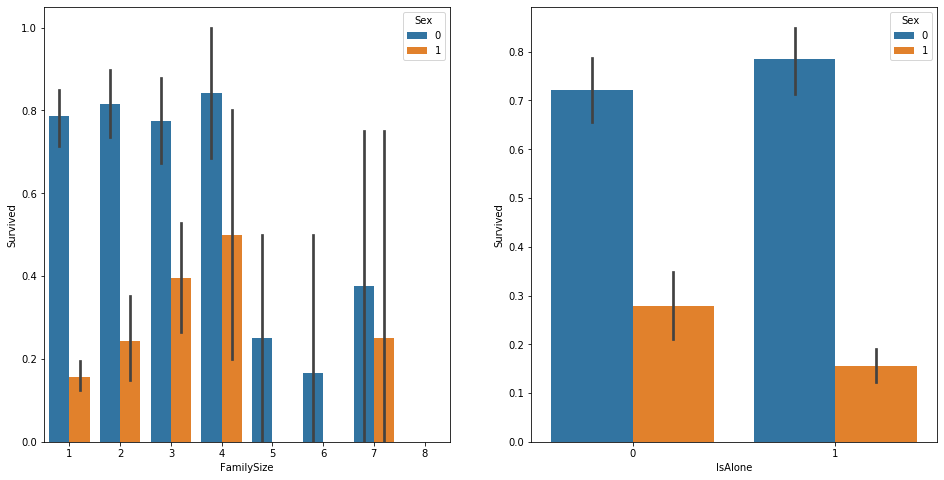

In [28]:
# SibSp & Parch

for dataset in full_data:
    #Creating new feature Family size
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
    #Creating new feature IsAlone
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
    #Creating new feature Young boys 
    dataset['Boys']=0
    dataset.loc[(dataset['Age']==0) & (dataset['Sex']==1),'Boys']=1
    
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.barplot(x='FamilySize',y='Survived',hue='Sex',data=train_data,ax=ax1)
sns.barplot(x='IsAlone',y='Survived',hue='Sex',data=train_data,ax=ax2)

In [29]:
#IsAlone does not result in a significant difference of survival rate.
#In addition, the slight difference between men and women go in different direction, 
#i.e. IsAlone alone is not a good predictor of survival. We can drop this feature.

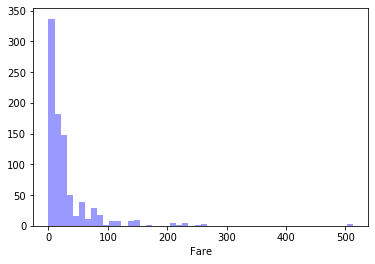

In [30]:
#Fare

sns.distplot(train_data['Fare'],bins=50,hist=True,kde=False,color='blue')

In [31]:
#We can generate interactive charts

import cufflinks as cf
cf.go_offline()
train_data['Fare'].iplot(kind='hist', bins=30)

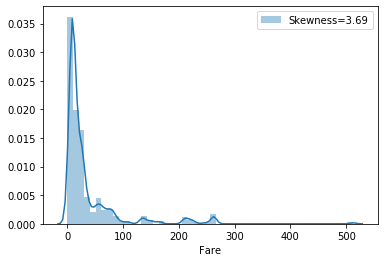

In [32]:
#Filling null values with median

for dataset in full_data:
    dataset['Fare']=dataset['Fare'].fillna(train_data['Fare'].median())
    
g=sns.distplot(dataset['Fare'],label='Skewness=%0.2f'%(dataset['Fare'].skew()))
g.legend(loc='best')

In [33]:
#The Fare distribution is very skewed to the left. This can lead to overweigthing the model with very high values.
#In this case, it is better to transform it with the log function to reduce the skewness and redistribute the data.

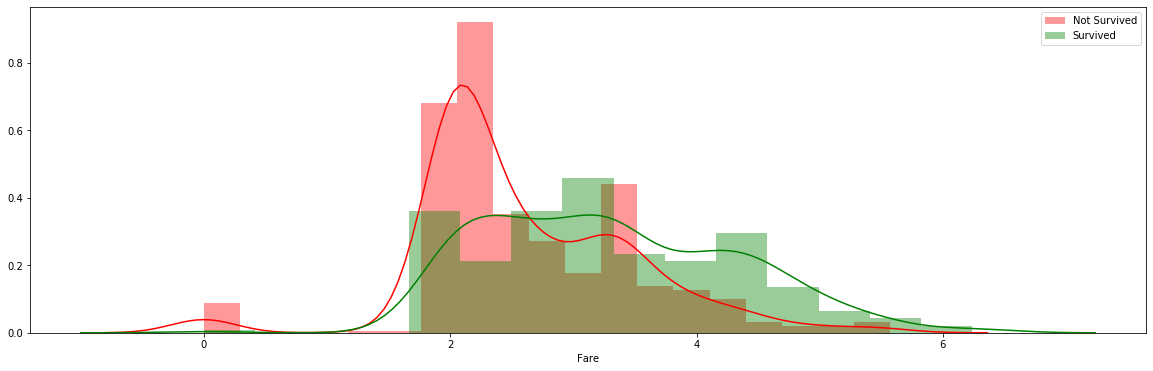

In [34]:
for dataset in full_data:
    dataset['Fare']=dataset['Fare'].map(lambda i: np.log(i) if i>0 else 0)

fig,ax=plt.subplots(figsize=(20,6))
g=sns.distplot(train_data['Fare'][train_data['Survived']==0],color='r',label='Skewness : %0.2f'%train_data['Fare'].skew(),ax=ax)
g=sns.distplot(train_data['Fare'][train_data['Survived']==1],color='green',label='Skewness : %0.2f'%train_data['Fare'].skew(),ax=ax)

g=g.legend(['Not Survived','Survived'])

In [35]:
#0 to 2.7: less survivors
#More than 2.7 more survivors

In [36]:
for dataset in full_data:
    dataset.loc[dataset['Fare']<=2.7,'Fare']=0
    dataset.loc[dataset['Fare']>2.7,'Fare']=1
    dataset['Fare']=dataset['Fare'].astype(int)
train_data['Fare'].value_counts()

0    457
1    424
Name: Fare, dtype: int64

In [37]:
#Cabin

In [38]:
for dataset in full_data:
    dataset['Has_Cabin']=dataset['Cabin'].apply(lambda x: 0 if type(x)==float else 1)
    
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin'],as_index=False).sum().sort_values(by='Survived',ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,134


In [39]:
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.302941


In [40]:
#It appears that Has_Cabin has a strong impact on the Survival rate. We will keep this feature.

In [41]:
#Embarked


In [42]:
for dataset in full_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train_pivot=pd.pivot_table(train_data,values='Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean,margins=True)

def color_negative_red(val):
    color='red' if val<0.4 else 'black'
    return 'color : %s'%color
train_pivot=train_pivot.style.applymap(color_negative_red)
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.587302,0.463415,0.193642,0.341195
1,0.694118,0.529412,0.378788,0.553571
2,0.5,0.666667,0.375,0.38961
All,0.629108,0.472826,0.245868,0.385925


In [43]:
#Irrespective of the class, passengers embarked in 0 (S) and 2 (Q) have lower chance of survival. I will combine those into the first category.

In [44]:
dataset['Embarked']=dataset['Embarked'].replace(['0','2'],'0')
train_data['Fare'].value_counts()

0    457
1    424
Name: Fare, dtype: int64

In [45]:
#Extracting deck from cabin

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in full_data:
    dataset['Cabin']=dataset['Cabin'].fillna('U0')
    dataset['Deck']=dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    
    dataset['Deck']=dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)
    
train_data['Deck'].value_counts()

8    680
3     56
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

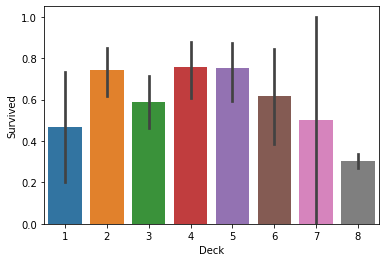

In [46]:
sns.barplot(x='Deck',y='Survived',order=[1,2,3,4,5,6,7,8], data=train_data)

In [47]:
for dataset in full_data:
    dataset.loc[dataset['Deck']<=1,'Deck']=1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train_data[['Deck','Survived']].groupby(['Deck'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Deck,Survived
2,3,0.690608
1,1,0.437500
0,0,0.304094


In [48]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Boys,Has_Cabin,Deck
0,1,0,3,1,1,1,0,A/5 21171,0,U0,0,2,0,0,0,0
1,2,1,1,0,2,1,0,PC 17599,1,C85,1,2,0,0,1,3
2,3,1,3,0,1,0,0,STON/O2. 3101282,0,U0,0,1,1,0,0,0
3,4,1,1,0,2,1,0,113803,1,C123,0,2,0,0,1,3
4,5,0,3,1,2,0,0,373450,0,U0,0,1,1,0,0,0


In [49]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Boys,Has_Cabin,Deck
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,0.649262,1.595914,0.455165,0.363224,0.481271,0.365494,1.818388,0.609535,0.044268,0.228150,0.634506
std,256.617021,0.487090,0.835055,0.477472,1.036902,0.871571,0.791839,0.499933,0.638100,1.382086,0.488132,0.205806,0.419878,1.210893
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,448.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,668.000000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,5.000000,6.000000,1.000000,2.000000,8.000000,1.000000,1.000000,1.000000,3.000000


In [50]:
train_data[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize
0,0,2.528651,0.855823,1.624769,0.304991,0.365989,0.312384,0.123845,1.757856
1,1,1.955882,0.320588,1.550000,0.455882,0.664706,0.450000,0.394118,1.914706


# Correlation analysis - Multi-variate analysis

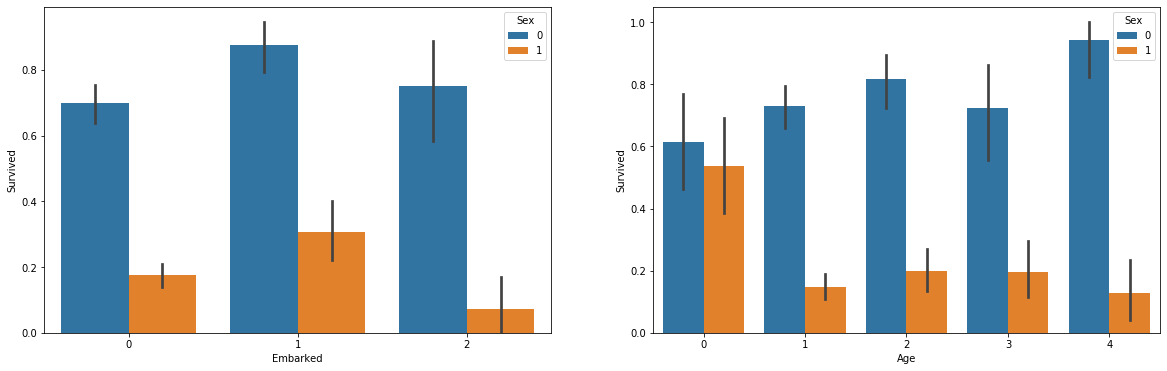

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=train_data,ax=ax1)
sns.barplot(x="Age",y='Survived',hue='Sex',data=train_data,ax=ax2)

In [52]:
# 0 or blue represent women; 1 or orange represent men. Gender and age seem to have a stronger influece of the survival rate.
# We start to find where most survivors are: older women (48 to 64 year old), and younger passengers.
# What is statistically interesting is that only young boys (Age Category = 0) have high survival rates, unlike other age groups for men.
# We will create a new feature called young boys

In [53]:
train_data[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [54]:
for dataset in full_data:
    dataset['Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==0), 'Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==2), 'Gender_Embarked'] = 1
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==1), 'Gender_Embarked'] = 2
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==2), 'Gender_Embarked'] = 3
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==0), 'Gender_Embarked'] = 4
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==1), 'Gender_Embarked'] = 5
train_data[["Gender_Embarked", "Survived"]].groupby(['Gender_Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Gender_Embarked,Survived
2,2,0.876712
1,1,0.750000
0,0,0.700000
5,5,0.305263
4,4,0.176606
3,3,0.073171


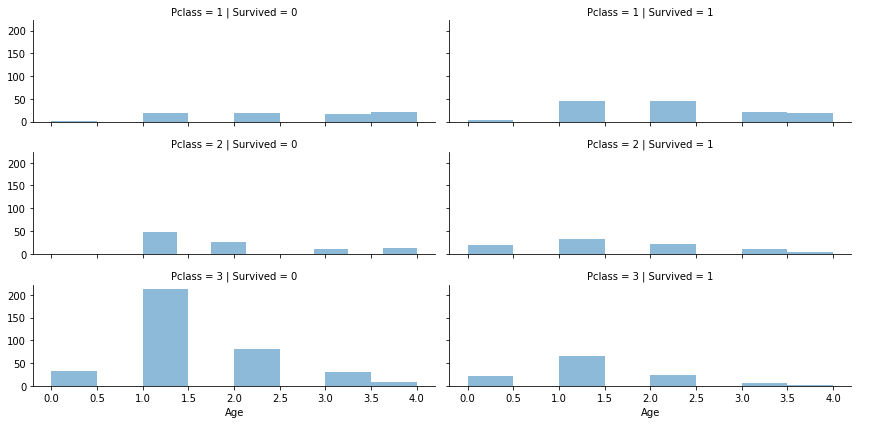

In [55]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

Observations: here are the survivors!

Family-size of 3 or 4 from first pivot
Women and men alone on first class (second pivot, red showing survival rate below 0.4)
Top-right in the graph above: first class and age categories 1 and 2
The not-so lucky are mostly in men, Pclass 3 and age category 1 (younger folks)

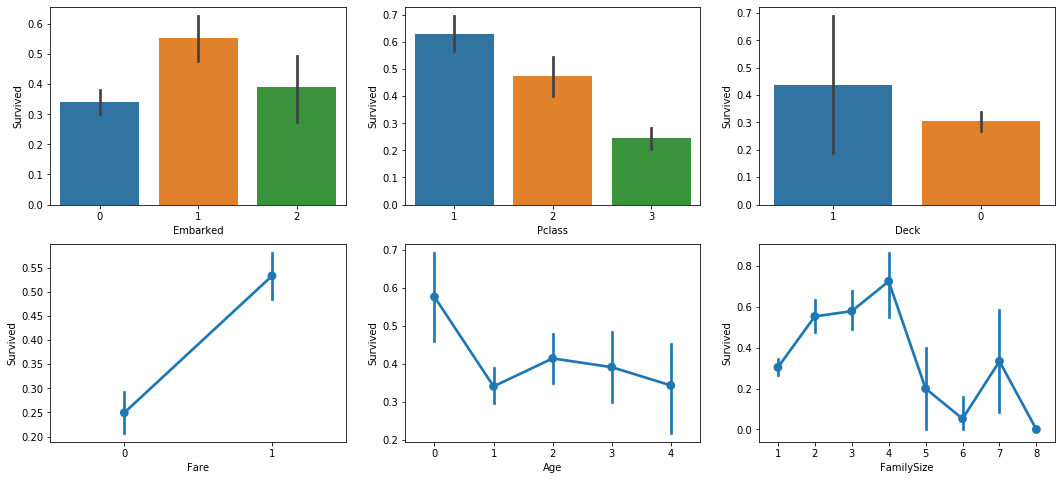

In [56]:
fig, saxis = plt.subplots(2, 3,figsize=(18,8))

sns.barplot(x = 'Embarked', y = 'Survived', data=train_data, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_data, ax = saxis[0,1])
sns.barplot(x = 'Deck', y = 'Survived', order=[1,0], data=train_data, ax = saxis[0,2])

sns.pointplot(x = 'Fare', y = 'Survived',  data=train_data, ax = saxis[1,0])
sns.pointplot(x = 'Age', y = 'Survived',  data=train_data, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train_data, ax = saxis[1,2])


C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



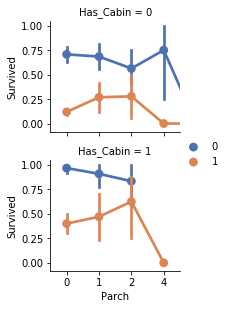

In [57]:
grid = sns.FacetGrid(train_data, row='Has_Cabin', size=2.2, aspect=1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Observations:

The colors represent: blue=0 is for women, green=1 for men
Clearly, women had more chance of surviving, with or without cabin
Interesting is that accompanied women without a cabin had less survival chance than women alone without cabin. But this is not true for men. Men alone have less chance than accompanied.

In [58]:
drop_elements = ['PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Boys', 'IsAlone', 'Embarked']

train_data = train_data.drop(drop_elements, axis = 1)
test_data  = test_data.drop(drop_elements, axis = 1)

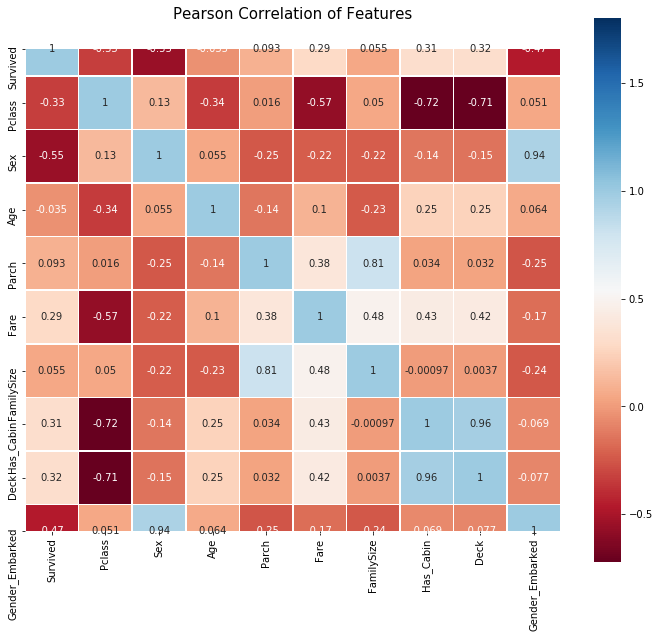

In [59]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.5,vmax=1.8, square=True, cmap=colormap, linecolor='white', annot=True)

In [60]:
train_data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,FamilySize,Has_Cabin,Deck,Gender_Embarked
0,0,3,1,1,0,0,2,0,0,4
1,1,1,0,2,0,1,2,1,3,2
2,1,3,0,1,0,0,1,0,0,0
3,1,1,0,2,0,1,2,1,3,0
4,0,3,1,2,0,0,1,0,0,4


C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



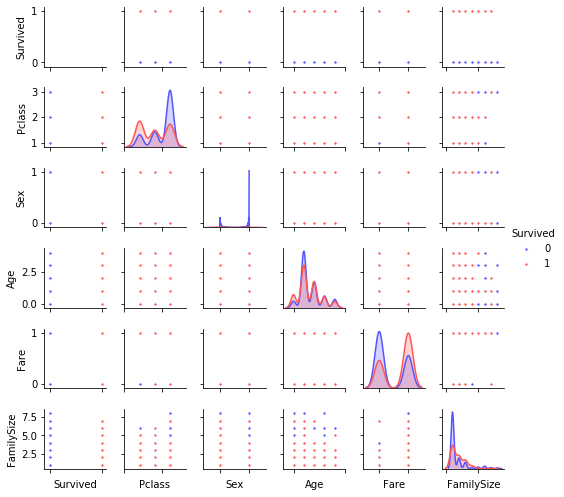

In [61]:
g = sns.pairplot(train_data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',
       u'FamilySize']], hue='Survived', palette = 'seismic',height=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

Observations

The pairplot graph all trivariate analysis into one figure.
The clustering of red dots indicates the combination of two features results in higher survival rates, or the opposite (clustering of blue dots = lower survival) For example:
Smaller family sizes in first and second class
Middle age with Pclass in third category = only blue dot This can be used to validate that we extracted the right features or help us define new ones.

In [62]:
Y_train=train_data['Survived']
X_train=train_data.drop(['Survived'],1)
X_train.shape, Y_train.shape, test_data.shape

from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)
X_test = test_data.copy()

In [63]:
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler()
#X_train=std.fit_transform(X_train)
#X_test=std.fit_transform(X_test)

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
Y_pred1=logreg.predict(x_test)
acc_log=round(logreg.score(x_test,y_test)*100,2)
acc_log

74.34

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pred1))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred1), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       154
           1       0.69      0.70      0.70       111

    accuracy                           0.74       265
   macro avg       0.74      0.74      0.74       265
weighted avg       0.74      0.74      0.74       265

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 119                   35
Actual: SURVIVED             33                   78


# Support Vector Classifier

In [67]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred2=svc.predict(x_test)
acc_svc=round(svc.score(x_test,y_test)*100,2)
acc_svc

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



81.89

In [68]:
print(classification_report(y_test,Y_pred2))
cm=pd.DataFrame(confusion_matrix(y_test,Y_pred2),['Actual: NOT','Actual : Survived'],['Predicted : Not','Predicted : Survived'])
cm

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       154
           1       0.79      0.77      0.78       111

    accuracy                           0.82       265
   macro avg       0.81      0.81      0.81       265
weighted avg       0.82      0.82      0.82       265



,Predicted : Not,Predicted : Survived
Actual: NOT,131,23
Actual : Survived,25,86


In [69]:
x_test.shape

(265, 9)

# K-Nearest Neighbour Algorithm

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(algorithm='auto',leaf_size=32,metric='minkowski',p=2,metric_params=None,n_jobs=1,n_neighbors=7,weights='uniform')

knn.fit(X_train,Y_train)
knn_preds=knn.predict(x_test)
knn_acc=round(knn.score(x_test,y_test)*100,2)
knn_acc

81.13

In [71]:
print(classification_report(y_test,knn_preds))
cm=pd.DataFrame(confusion_matrix(y_test,knn_preds),['Actual : No','Actual : Survived'],['Predicted : No','Predicted : Survived'])
cm

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       154
           1       0.80      0.74      0.77       111

    accuracy                           0.81       265
   macro avg       0.81      0.80      0.80       265
weighted avg       0.81      0.81      0.81       265



,Predicted : No,Predicted : Survived
Actual : No,133,21
Actual : Survived,29,82


[23, 0.8529411764705882]


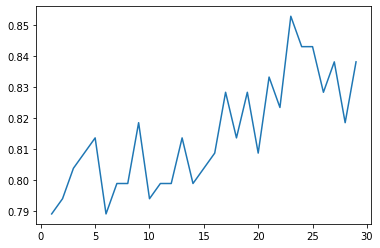

In [72]:
from sklearn.metrics import accuracy_score
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(X_train,Y_train,test_size = .33, random_state = 0)

nn_scores=[]
best_prediction=[-1,-1]

for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i,weights='uniform',metric='minkowski',p=2,leaf_size=30,algorithm='auto')
    knn1.fit(x_trainknn,y_trainknn)
    score=accuracy_score(y_testknn,knn1.predict(x_testknn))
    
    if score>best_prediction[1]:
        best_prediction=[i,score]
    nn_scores.append(score)
    
print(best_prediction)
plt.plot(range(1,30),nn_scores)

# Naive Bayes Classifier

In [73]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred3=gaussian.predict(x_test)
acc_gauss=round(gaussian.score(x_test,y_test)*100,2)
acc_gauss

72.45

In [74]:
print(classification_report(y_test,Y_pred3))
cm=pd.DataFrame(confusion_matrix(y_test,Y_pred3),['Actual : No','Actual : Survived'],['Predicted : No','Predicted : Survived'])
cm

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       154
           1       0.64      0.78      0.70       111

    accuracy                           0.72       265
   macro avg       0.73      0.73      0.72       265
weighted avg       0.74      0.72      0.73       265



,Predicted : No,Predicted : Survived
Actual : No,105,49
Actual : Survived,24,87


# Perceptron


In [75]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred4=perceptron.predict(x_test)
acc_perceptron=round(perceptron.score(x_test,y_test)*100,2)
acc_perceptron

76.23

In [76]:
print(classification_report(y_test,Y_pred4))
cm=pd.DataFrame(confusion_matrix(y_test,Y_pred4),['Actual : No', 'Actual : Survived'],['Predicted : Yes','Predicted : No'])
cm

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.62      0.69       111

    accuracy                           0.76       265
   macro avg       0.76      0.74      0.75       265
weighted avg       0.76      0.76      0.76       265



,Predicted : Yes,Predicted : No
Actual : No,133,21
Actual : Survived,42,69


# Linear SVC

In [77]:
from sklearn.svm import LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
pred_Y5=linear_svc.predict(x_test)
acc_svcL=round(linear_svc.score(x_test,y_test)*100,2)
acc_svcL

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



75.85

In [78]:
print(classification_report(y_test,pred_Y5))
cm=pd.DataFrame(confusion_matrix(y_test,pred_Y5),['Actual : NO','Actual : Yes'],['Predicted : No','Predicted : Yes'])
cm

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       154
           1       0.72      0.69      0.71       111

    accuracy                           0.76       265
   macro avg       0.75      0.75      0.75       265
weighted avg       0.76      0.76      0.76       265



,Predicted : No,Predicted : Yes
Actual : NO,124,30
Actual : Yes,34,77


# Decision tree


In [105]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(max_depth=25,max_features=6,min_samples_split=2)
dec.fit(X_train,Y_train)
pred_y6=dec.predict(x_test)
dec_acc=round(dec.score(x_test,y_test)*100,2)
dec_acc

74.72

In [106]:
print(classification_report(y_test, pred_y6))
cm = pd.DataFrame(confusion_matrix(y_test, pred_y6), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       154
           1       0.72      0.65      0.68       111

    accuracy                           0.75       265
   macro avg       0.74      0.73      0.74       265
weighted avg       0.75      0.75      0.74       265

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 126                   28
Actual: SURVIVED             39                   72


# Random Forests

In [113]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(n_estimators=45)
ran.fit(X_train,Y_train)
pred_y7=ran.predict(x_test)
ran_acc=round(ran.score(x_test,y_test)*100,2)
ran_acc

75.85

In [114]:
print(classification_report(y_test, pred_y7))
cm = pd.DataFrame(confusion_matrix(y_test, pred_y7), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       154
           1       0.73      0.68      0.70       111

    accuracy                           0.76       265
   macro avg       0.75      0.75      0.75       265
weighted avg       0.76      0.76      0.76       265

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 126                   28
Actual: SURVIVED             36                   75


# Final Chart

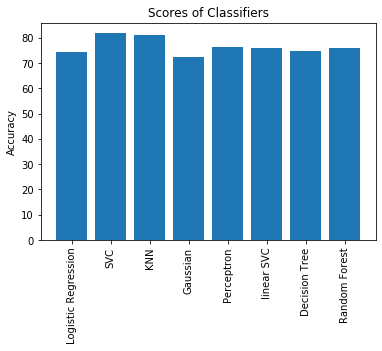

In [115]:
Objects=('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'linear SVC','Decision Tree','Random Forest')

x_axis=np.arange(len(Objects))
accuracies1=[acc_log,acc_svc,knn_acc,acc_gauss,acc_perceptron,acc_svcL,dec_acc,ran_acc]

plt.bar(x_axis,accuracies1)
plt.xticks(x_axis,Objects,rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Scores of Classifiers')
plt.show()